In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('../datasets/StudentsPerformance.csv')

In [3]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
# Rename columns for convenience
df.columns = ['_'.join(col.split(' ')) for col in df.columns]

In [6]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
# Add total score
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']

## Analysing scores

In [8]:
df_scores = df[['math_score', 'reading_score', 'writing_score', 'total_score']]

In [9]:
df_scores.describe()

,math_score,reading_score,writing_score,total_score
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000
std,15.16308,14.600192,15.195657,42.771978
min,0.00000,17.000000,10.000000,27.000000
25%,57.00000,59.000000,57.750000,175.000000
50%,66.00000,70.000000,69.000000,205.000000
75%,77.00000,79.000000,79.000000,233.000000
max,100.00000,100.000000,100.000000,300.000000


Feature: math_score
Results of KStest normality test: D=0.999, p-value=0.0


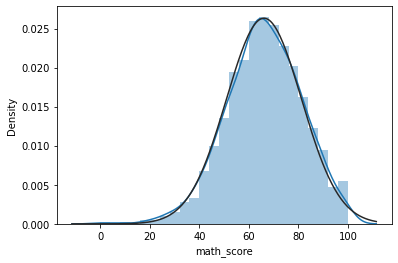

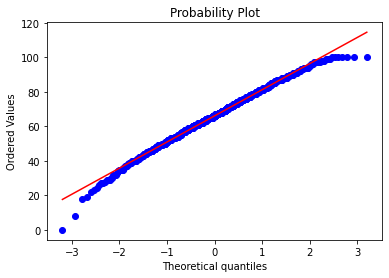

Feature: reading_score
Results of KStest normality test: D=1.000, p-value=0.0


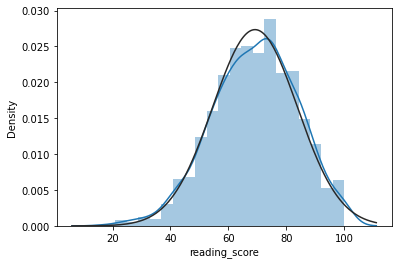

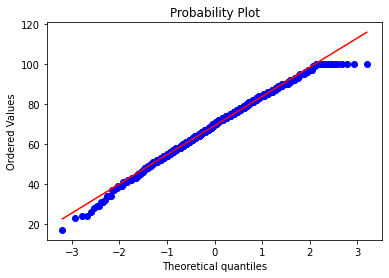

Feature: writing_score
Results of KStest normality test: D=1.000, p-value=0.0


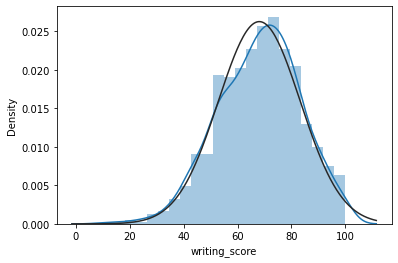

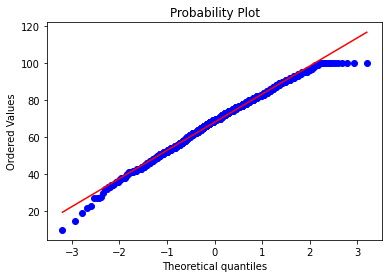

Feature: total_score
Results of KStest normality test: D=1.000, p-value=0.0


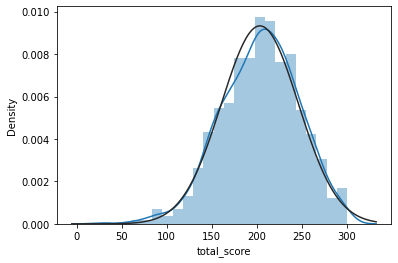

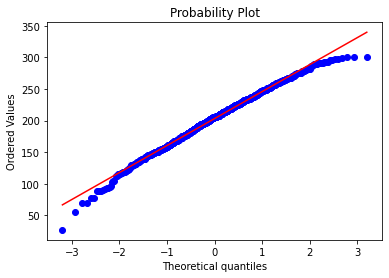

In [13]:
for col in df_scores:
    ks = stats.kstest(df_scores[col], 'norm')
    print('Feature: {}'.format(col))
    print('Results of KStest normality test: D={:.3f}, p-value={}'.format(ks[0], ks[1]))
    sns.distplot(df_scores[col], fit=stats.norm, kde=True)
    fig = plt.figure()
    res = stats.probplot(df_scores[col], plot=plt)
    plt.show()
    print('='*50)